In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
C_filepath = "data/TF_phase/C_array_MF.csv"


df_C = pd.read_csv(C_filepath)

In [57]:
R = 50 
N = 201
dt = 0.005
array = df_C.to_numpy()

C_r_t_50 = array[:,1]
C_r_t_50 = np.where(C_r_t_50==0, 1.0e-92, C_r_t_50)
tmax = 275
times = array[:,0]

C_r_t_50 = C_r_t_50 * 2**N
C_r_t_50 = C_r_t_50.astype('float64')

In [58]:
length = len(C_r_t_50)
half = int(length/2)

In [59]:
grad = np.gradient(C_r_t_50, times)
grad_2 = np.gradient(grad,times)
print(len(grad_2))
peak = np.where(grad_2[:half] == grad_2[:half].min())[0]
start = np.where(grad>0.001)[0]



40000


Text(0, 0.5, 'd2/dt2 log(C(r,t))')

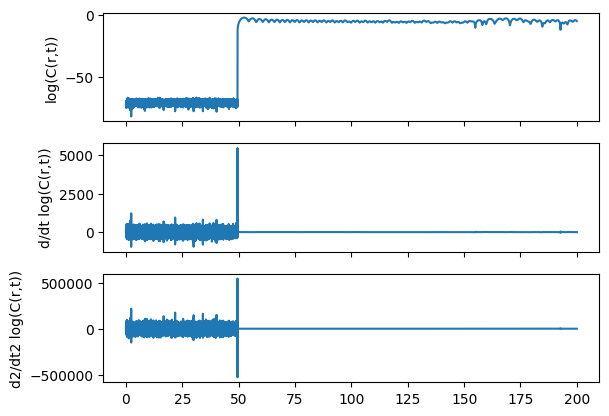

In [74]:
log = np.log(C_r_t_50)
log_grad = np.gradient(log, times)
l_p = log_grad.max()
log_grad_2 = np.gradient(log_grad, times)
fig, ax = plt.subplots(3,1, sharex=True)
ax[0].plot(times[:],np.log(C_r_t_50)[:])
ax[0].set_ylabel("log(C(r,t))")
ax[1].plot(times[:], log_grad[:])
ax[1].set_ylabel("d/dt log(C(r,t))")
ax[2].plot(times[:],log_grad_2[:])
ax[2].set_ylabel("d2/dt2 log(C(r,t))")

array([52.535])

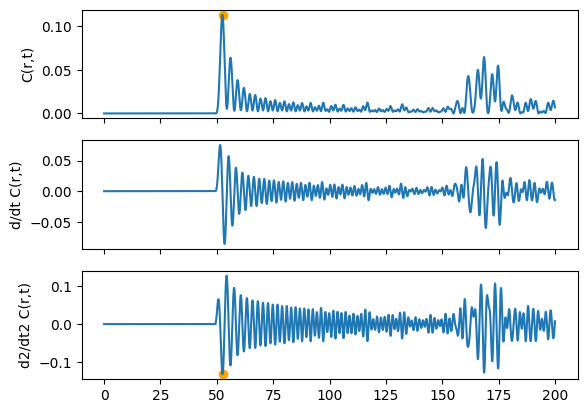

In [76]:
fig, ax = plt.subplots(3,1, sharex=True)
ax[0].plot(times[:],C_r_t_50[:])
ax[0].set_ylabel("C(r,t)")
ax[1].plot(times[:], grad[:])
ax[1].set_ylabel("d/dt C(r,t)")
ax[2].plot(times[:],grad_2[:])
ax[2].set_ylabel("d2/dt2 C(r,t)")
ax[2].scatter(times[peak], grad_2[peak], color="orange")
ax[0].scatter(times[peak], C_r_t_50[peak], color="orange")
times[peak]

In [62]:
t_B = times[peak]
v_B = R/t_B[0]
v_B

0.9517464547443036

In [63]:
def C_early(t,p,lambda_p=l_p,v_B=v_B,r=R):
    return -lambda_p * ((r/v_B - (t))**(1+p))/((t)**p)

In [64]:
start[0]

9931

In [65]:
time_data = times[start[0]:peak[0]]
C_data = C_r_t_50[start[0]:peak[0]]

In [66]:
guess = [0.1]

popt, pcov = curve_fit(C_early, time_data, C_data, p0=guess)

popt

array([9.97582097])

Text(0.5, 1.0, 'C_early with fitted parameters')

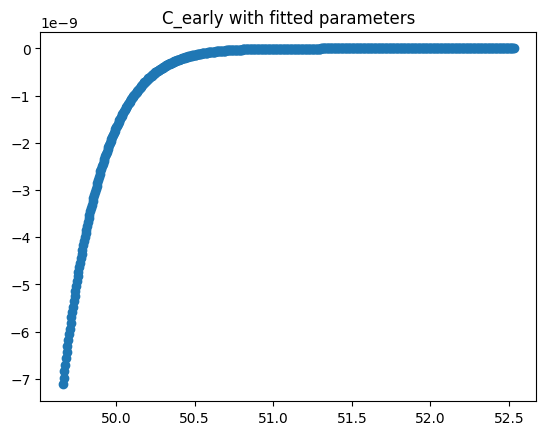

In [72]:
params = popt 

plt.scatter(time_data,C_early(time_data,*params))
plt.title("C_early with fitted parameters")

Text(0.5, 1.0, 'fit')

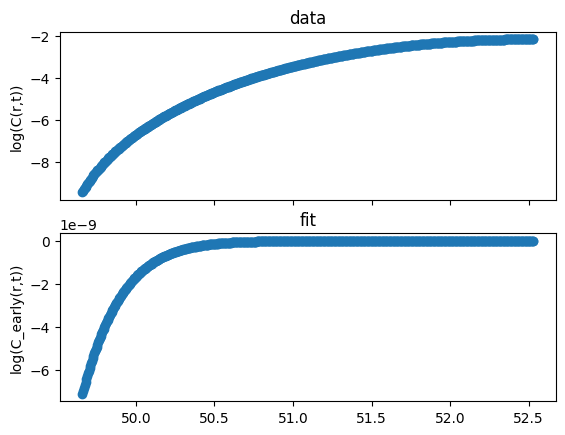

In [71]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(time_data,np.log(C_data))
ax[0].set_ylabel("log(C(r,t))")
ax[1].scatter(time_data, C_early(time_data,*params))
ax[1].set_ylabel("log(C_early(r,t))")
ax[0].set_title("data")
ax[1].set_title("fit")

Text(0.5, 1.0, 'log-log plot')

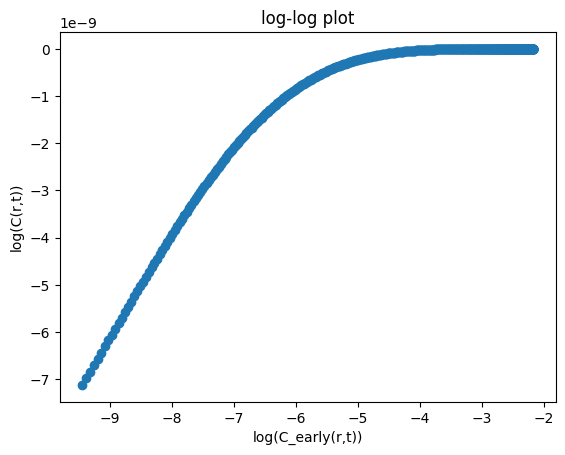

In [70]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.log(C_data),C_early(time_data,*popt))
ax.set_xlabel("log(C_early(r,t))")
ax.set_ylabel("log(C(r,t))")
ax.set_title("log-log plot")